In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')



In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.shape

(32560, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
for i in df.columns:
    print(i,"\n",df[i].value_counts)

Age 
 <bound method IndexOpsMixin.value_counts of 0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 32560, dtype: int64>
Workclass 
 <bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>
Fnlwgt 
 <bound method IndexOpsMixin.value_counts of 0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 32560, dtype: int64>
Education 
 <bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2       

In [13]:
df['Workclass']=df.Workclass.str.replace('?','Private')
df['Occupation']=df.Occupation.str.replace('?','Prof_speciality')
df['Native_country']=df.Native_country.str.replace('?','United States')

In [14]:
df.duplicated().sum()

24

In [15]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
cat_cols = [x for x in df.columns if df[x].dtypes=='O']

In [18]:
num_cols = [y for y in df.columns if df[y].dtypes!='O']

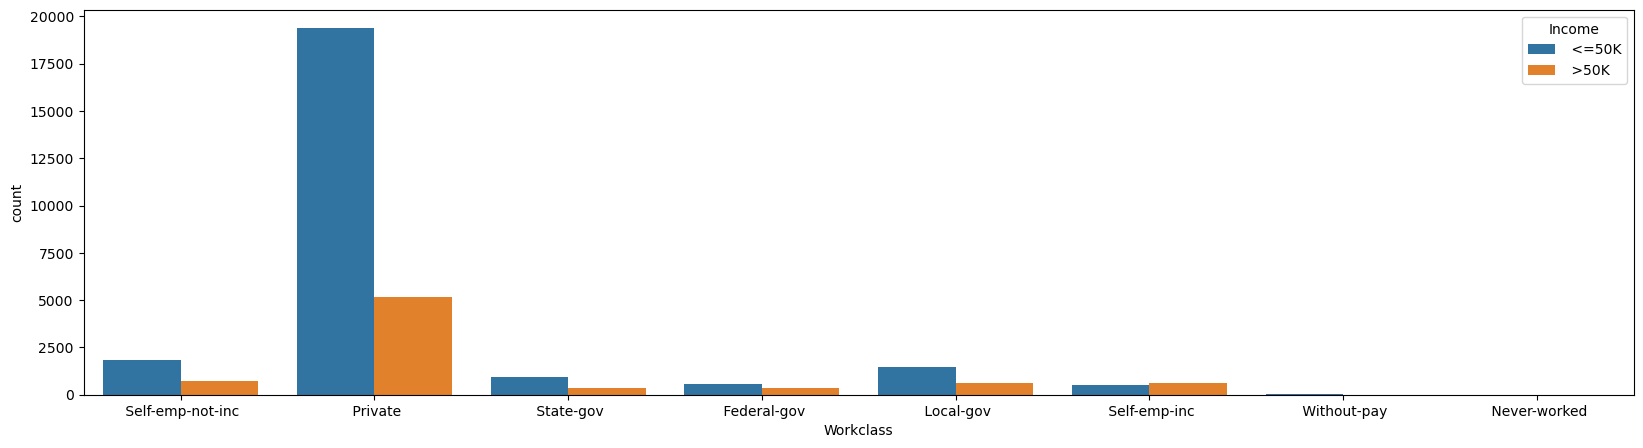

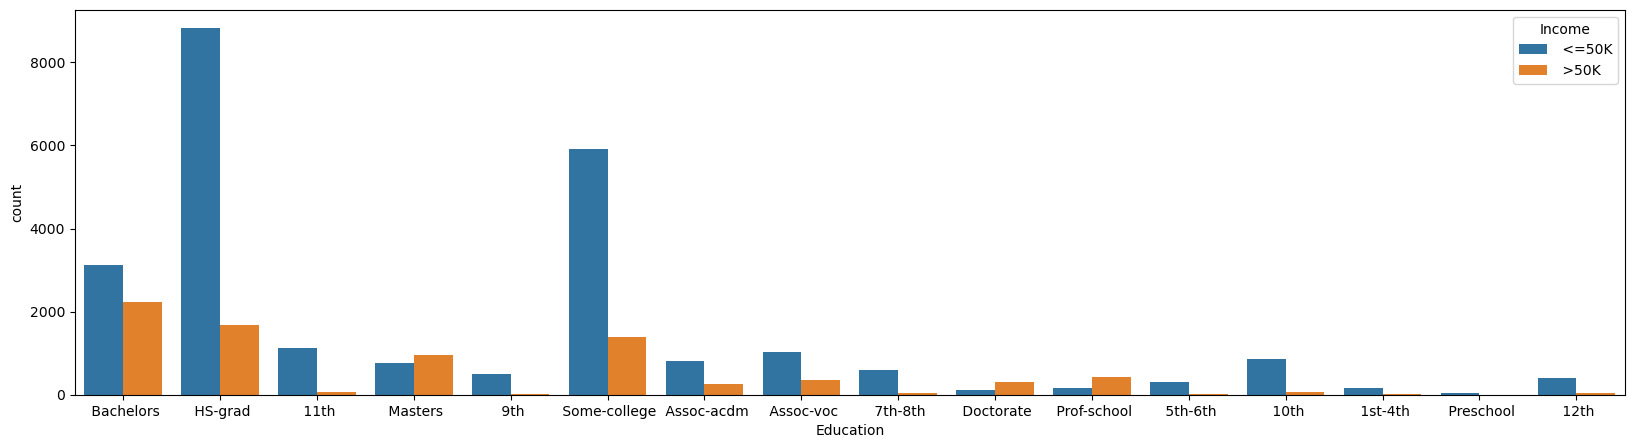

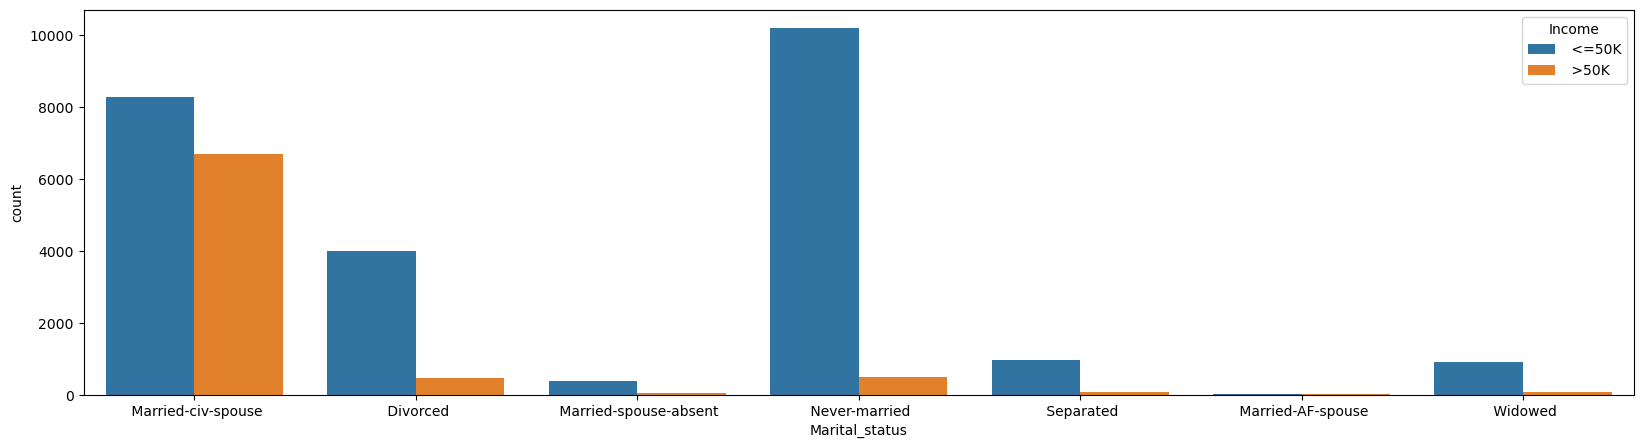

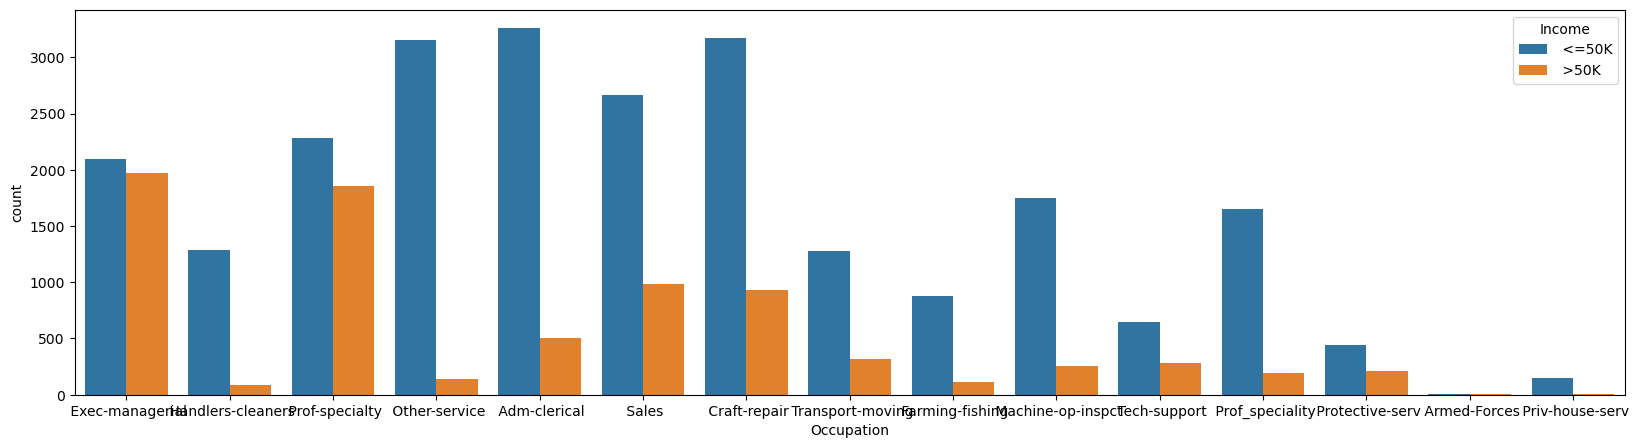

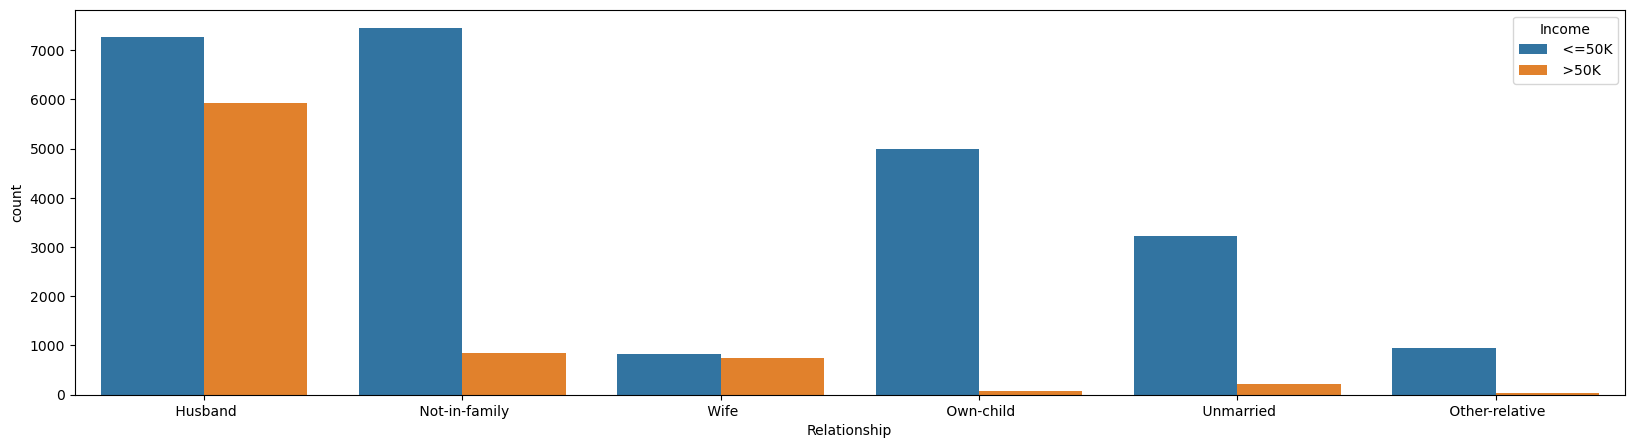

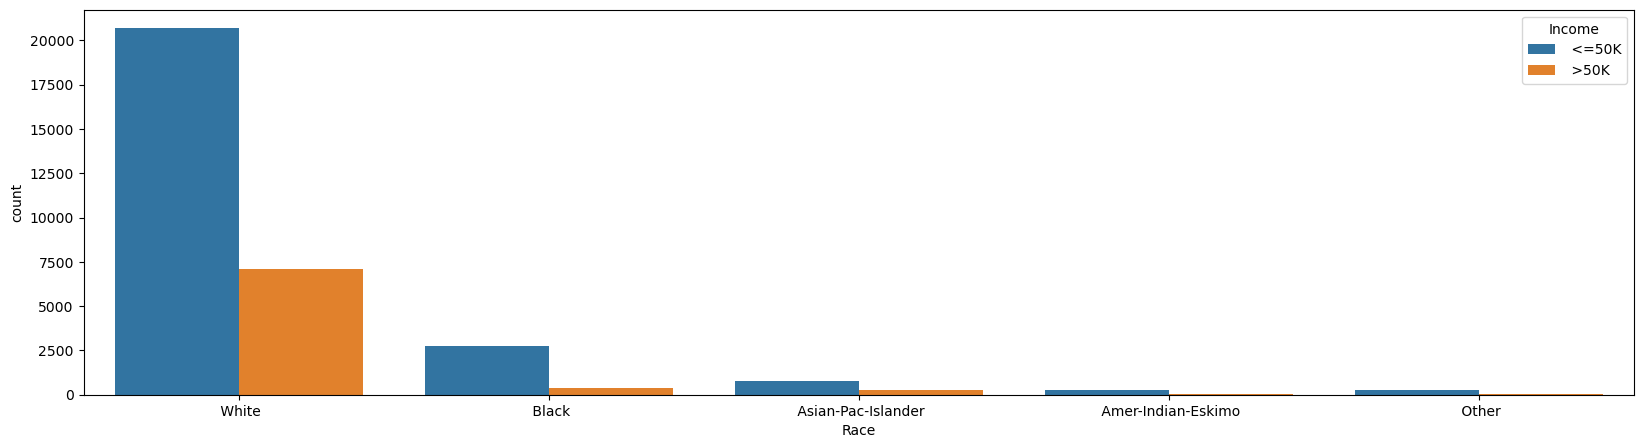

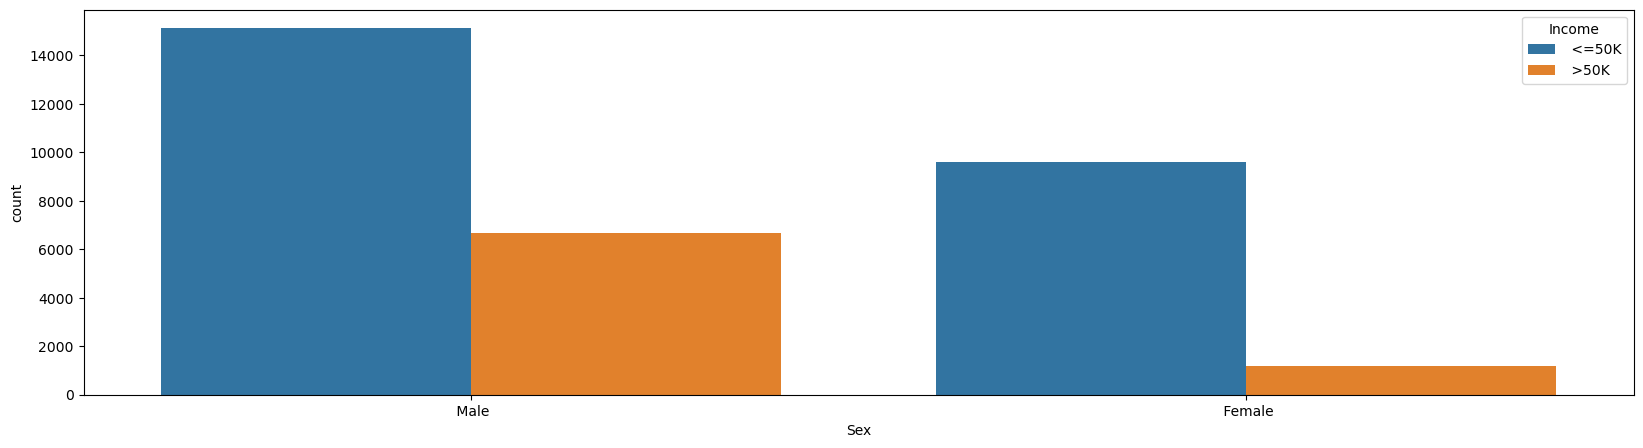

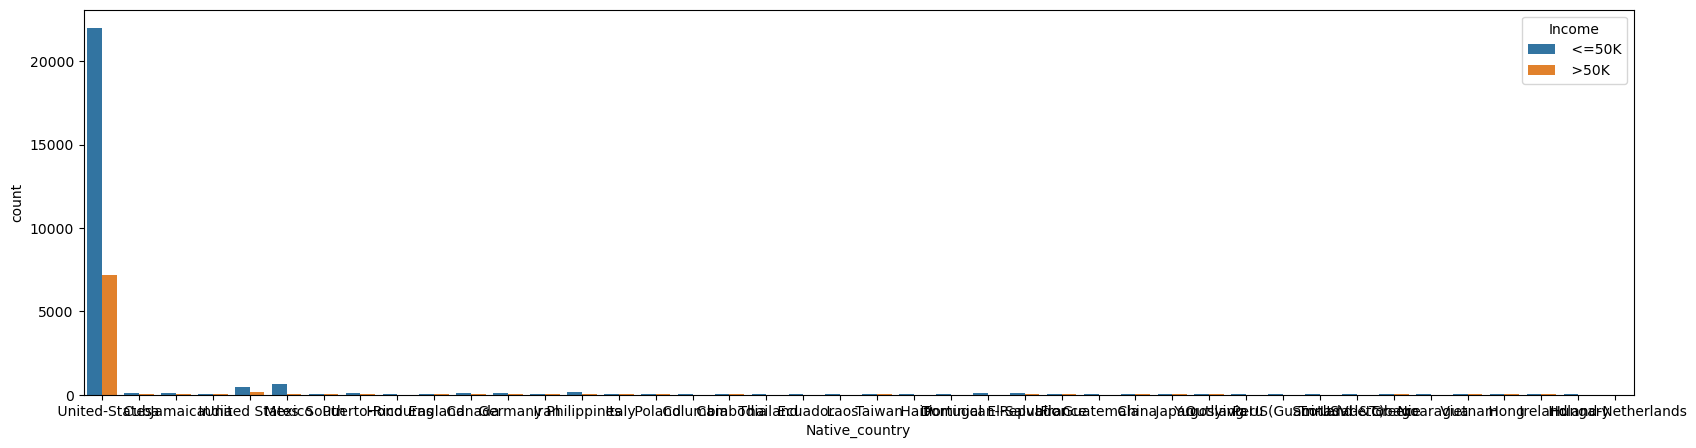

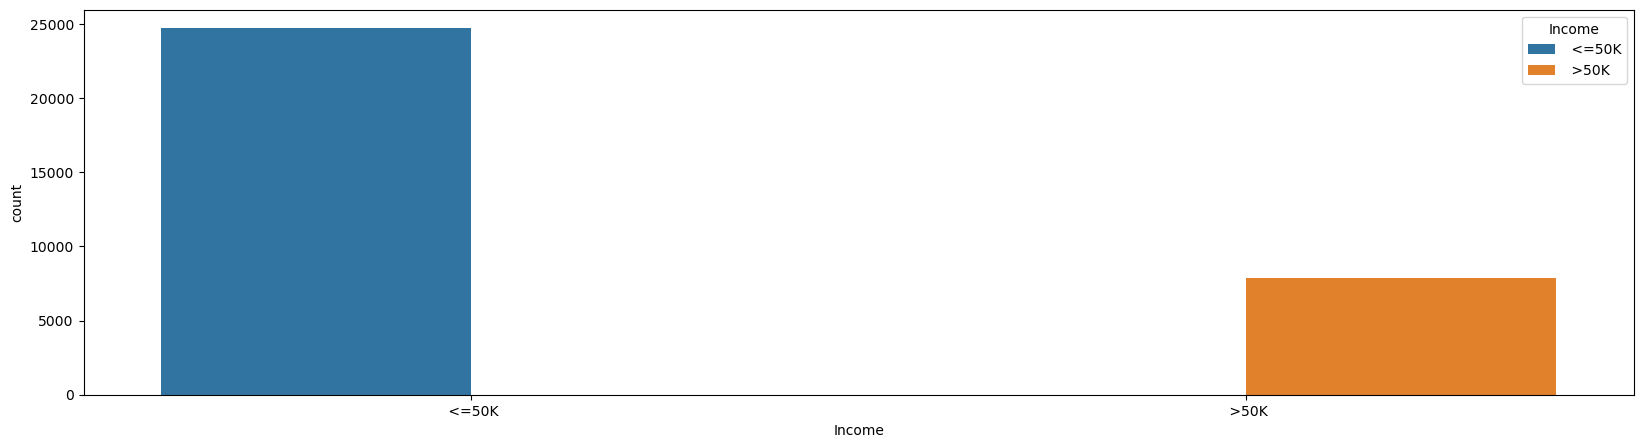

In [19]:
for i in df[cat_cols]:
    plt.figure(figsize=(20,5))
    chart=sns.countplot(x=i,data=df,hue='Income')
    plt.show()

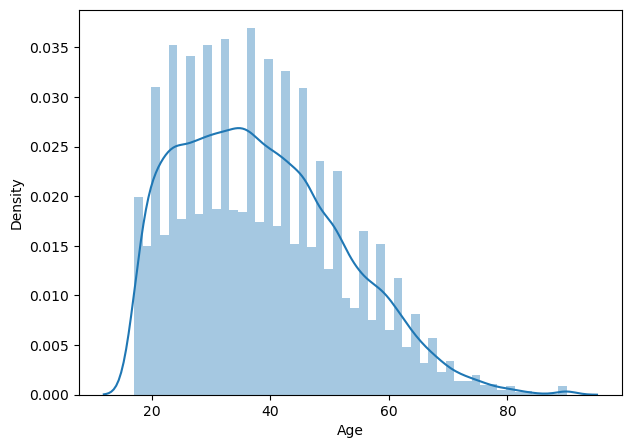

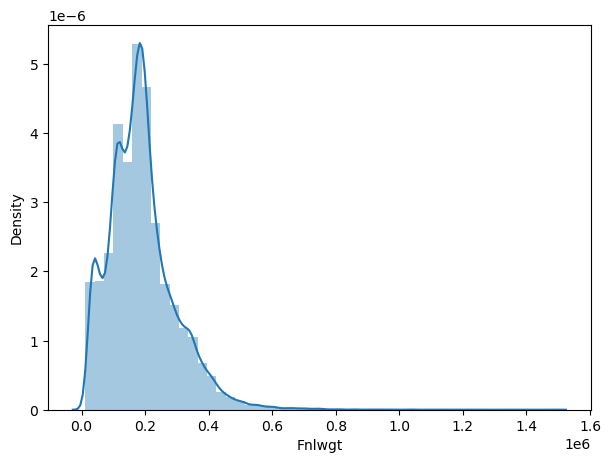

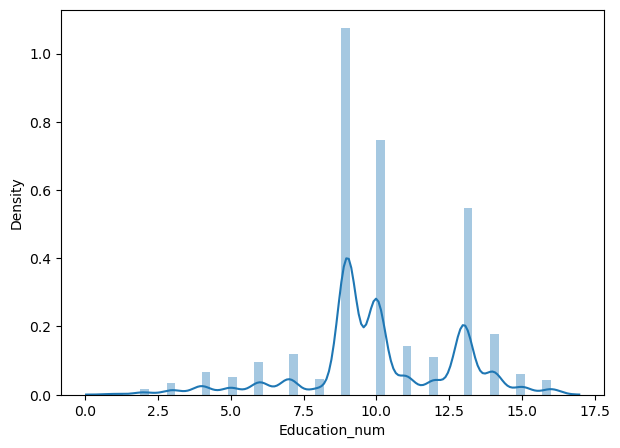

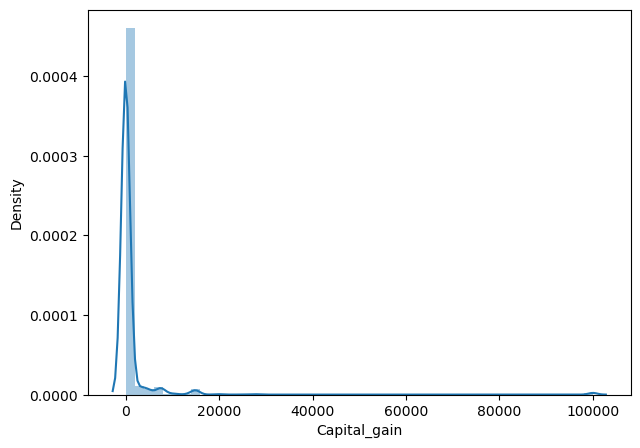

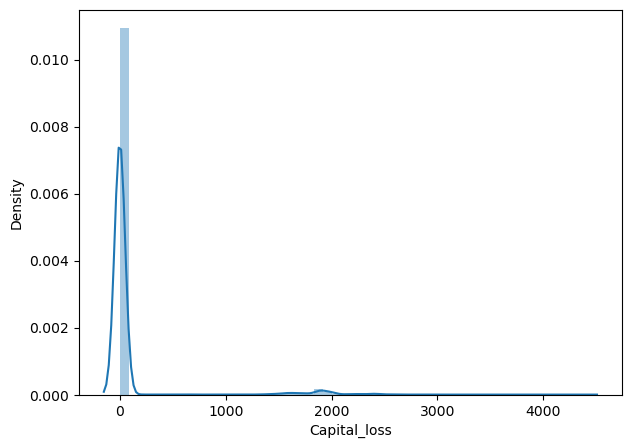

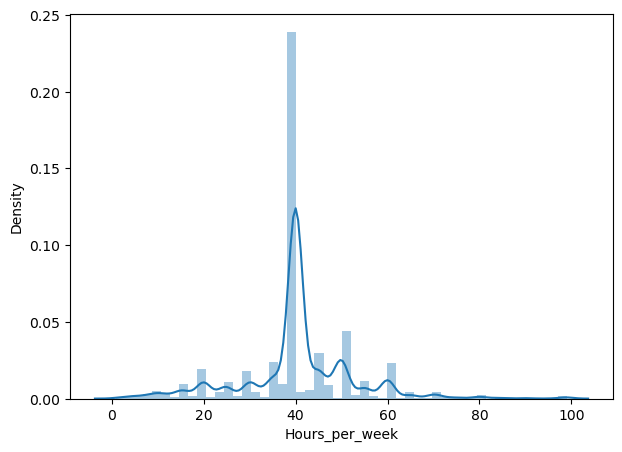

In [20]:
for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,kde=True)
    plt.show()

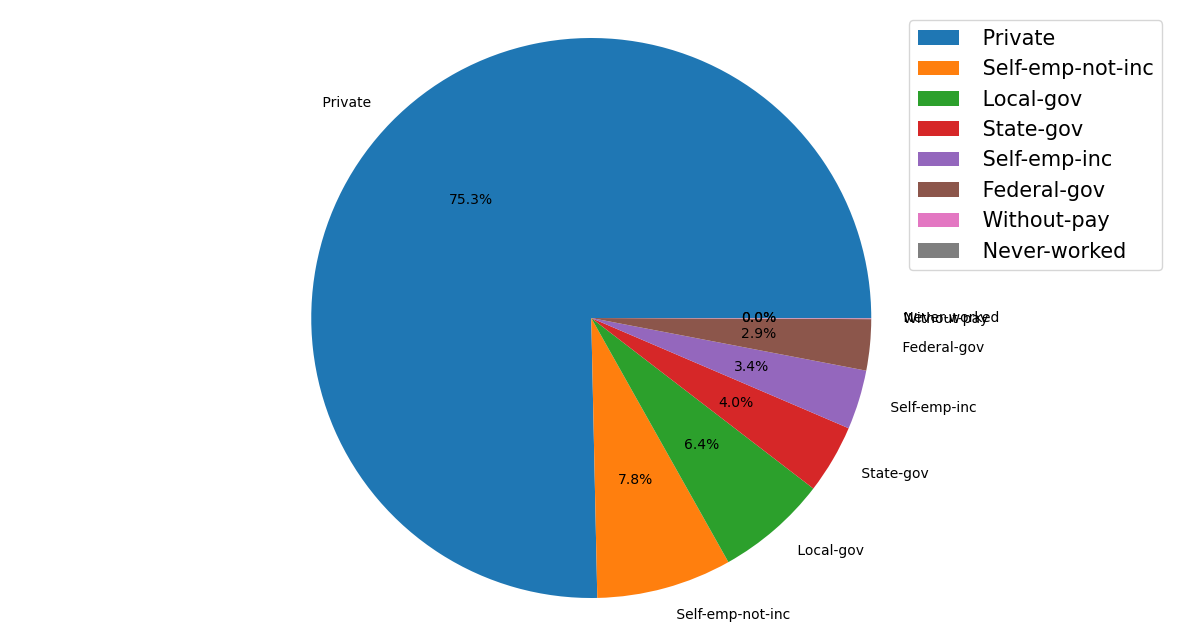

In [21]:
plt.figure(figsize=(15,8))
plt.pie(df["Workclass"].value_counts().values, labels=df['Workclass'].value_counts().index,autopct='%1.1f%%')
center_circle=plt.Circle((0,0), 0.5, fc='white')
fig=plt.gcf()
plt.axis('equal')
plt.legend(prop={'size':15})
plt.show()

In [291]:
#df.drop("Workclass",axis=1)

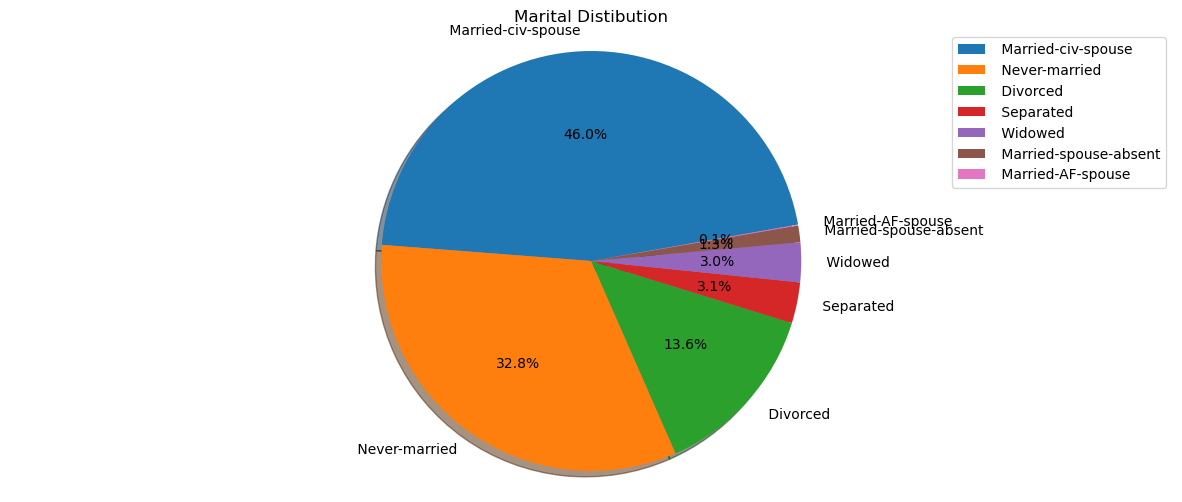

In [22]:
marital=df['Marital_status'].value_counts()
plt.figure(figsize=(15,6))
plt.pie(marital.values,labels=marital.index,startangle=10,shadow=True,autopct='%1.1f%%')
plt.title("Marital Distibution")
plt.legend()
plt.axis('equal')
plt.show()

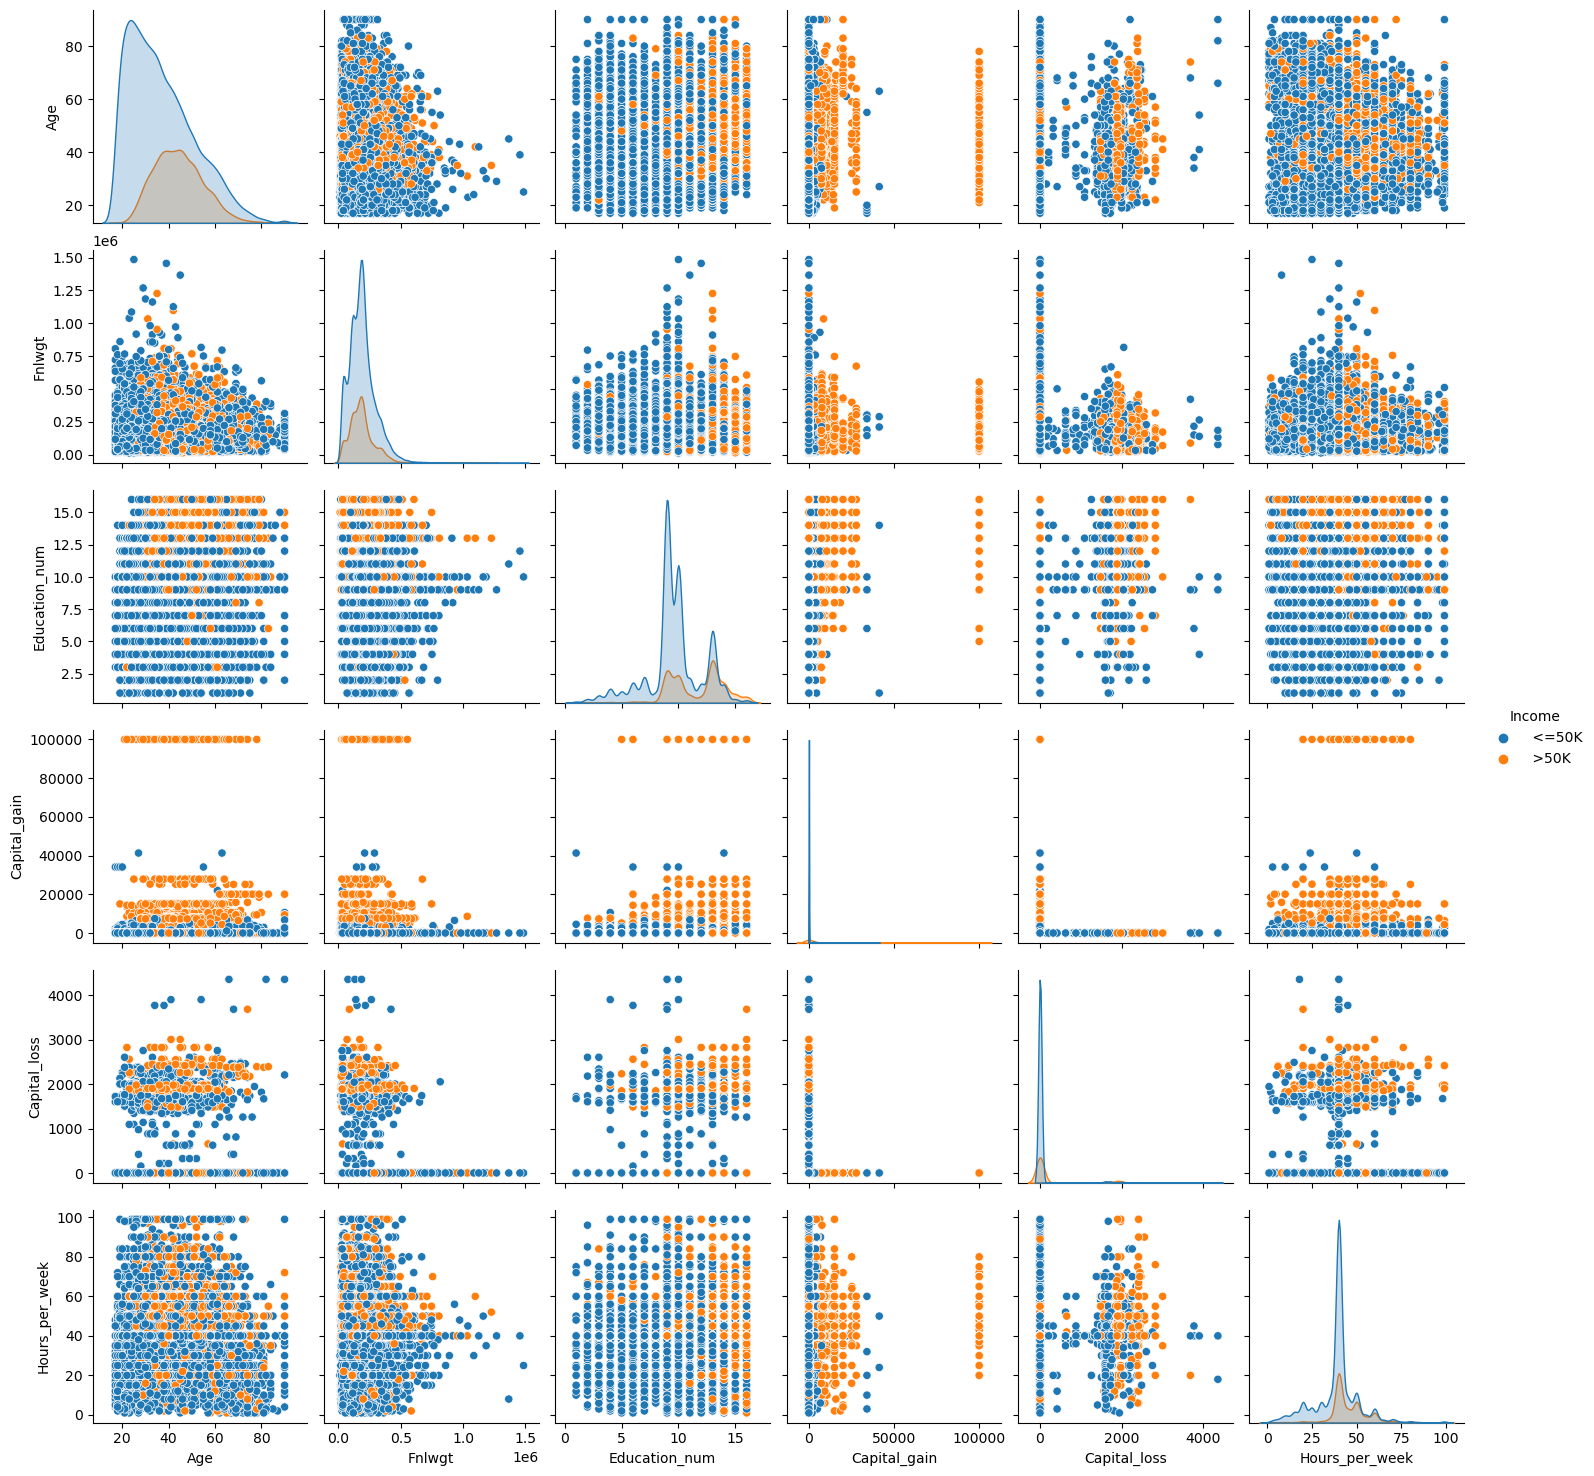

In [23]:
sns.pairplot(df,hue='Income')
plt.show()

In [24]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [25]:
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace=True)

In [26]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [27]:
df.drop(columns="Capital_loss",inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

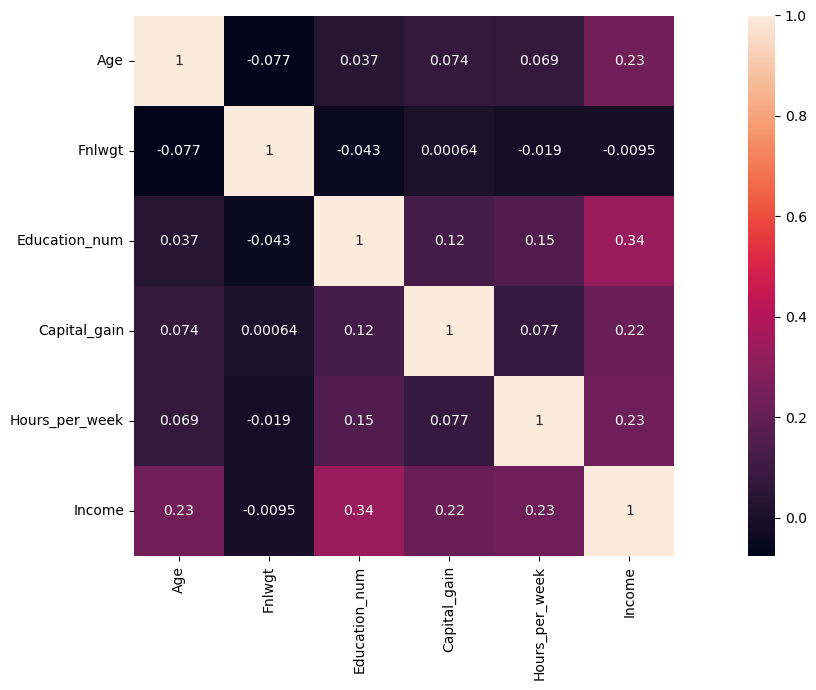

In [29]:
df_corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(df_corr,annot=True,square=True)
plt.tight_layout()

In [30]:
x=df.drop(columns='Income')
y=df["Income"]

In [333]:
leb_enc=LabelEncoder()
for i in x.columns:
    if x[i].dtypes=="Object":
        x[i]=leb_enc.fit_transform(x[i])

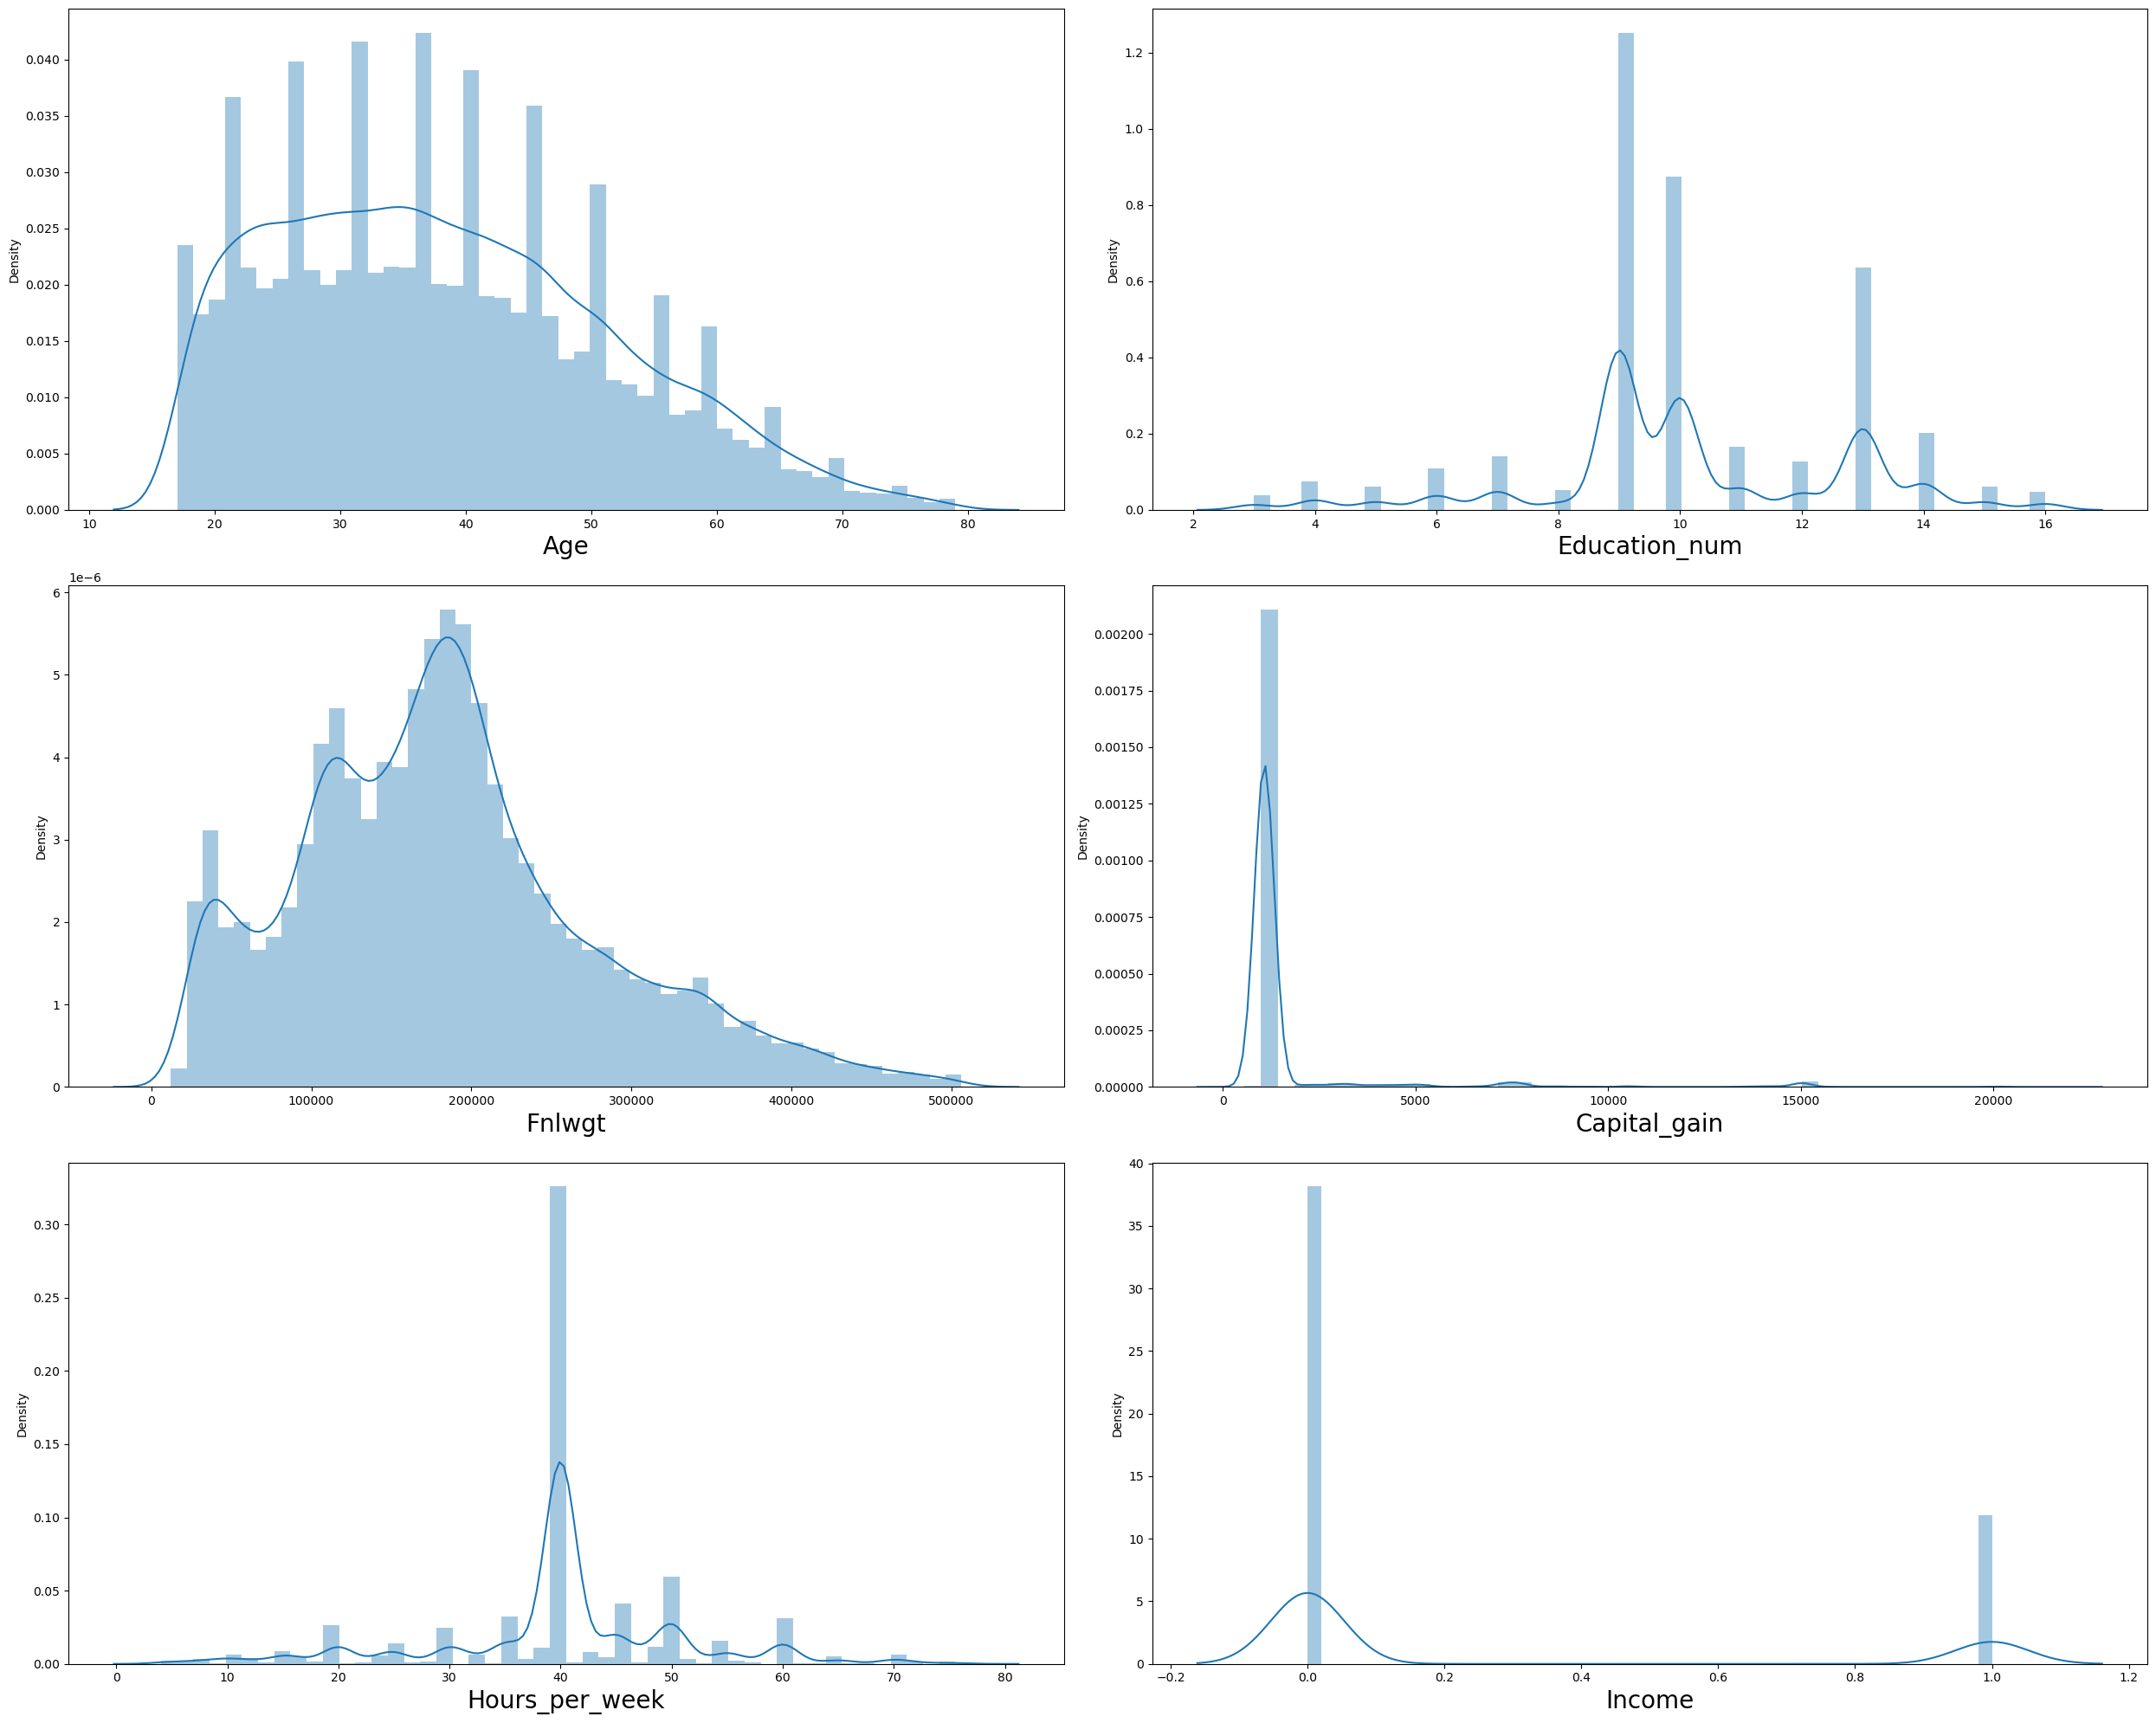

In [334]:
plt.figure(figsize=(25,20))
plotnumber=1
columns=["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <= 6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.tight_layout()

In [335]:
from scipy import stats
from scipy.stats import zscore
z_score=zscore(df[["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week"]])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,1077.615172,40,United-States,0
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0


In [336]:
df.shape

(30219, 14)

In [337]:
x=df.drop(columns='Income')
y=df['Income']

In [338]:
x.skew()

Age               0.471422
Fnlwgt            0.547130
Education_num    -0.166868
Capital_gain      5.173719
Hours_per_week   -0.312626
dtype: float64

<Figure size 2000x1000 with 0 Axes>

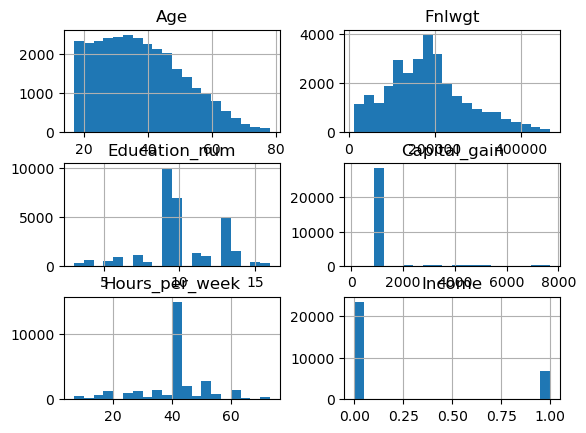

In [339]:
plt.figure(figsize=(20,10))
df.hist(bins=20)
plt.show()

In [340]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
x['Age']=scaler.fit_transform(x['Age'].values.reshape(-1,1))
x['Fnlwgt']=scaler.fit_transform(x['Fnlwgt'].values.reshape(-1,1))
x['Education_num']=scaler.fit_transform(x['Education_num'].values.reshape(-1,1))
x['Capital_gain']=scaler.fit_transform(x['Capital_gain'].values.reshape(-1,1))
x['Hours_per_week']=scaler.fit_transform(x['Hours_per_week'].values.reshape(-1,1))


In [341]:
x.skew()

Age              -0.018974
Fnlwgt           -0.044720
Education_num     0.024461
Capital_gain     -6.006500
Hours_per_week    0.101658
dtype: float64

In [31]:
leb_enc=LabelEncoder()
for i in x.columns:
    if x[i].dtypes=='object':
        x[i]=leb_enc.fit_transform(x[i])
        

In [32]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [33]:
#conda install -c glemaitre imbalanced-learn

In [34]:
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [35]:
x_over

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,1077.615172,13,39
1,38,3,215646,11,9,0,5,1,4,1,1077.615172,40,39
2,53,3,234721,1,7,2,5,0,2,1,1077.615172,40,39
3,28,3,338409,9,13,2,9,5,2,0,1077.615172,40,4
4,37,3,284582,12,14,2,3,5,4,0,1077.615172,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,46,0,201125,15,10,1,8,0,3,0,1077.615172,55,39
49434,38,3,184093,8,12,2,8,4,4,0,7645.931045,23,39
49435,52,3,193098,9,11,2,6,0,4,1,1077.615172,41,39
49436,43,3,400819,12,12,2,7,0,4,1,1077.615172,41,39


In [36]:
from sklearn.preprocessing import StandardScaler
num_data=pd.DataFrame(x_over,columns=["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week"])
scaler=StandardScaler()
x_num=scaler.fit_transform(num_data)
x_num=pd.DataFrame(x_num,columns=num_data.columns)
cat_data=x_over.drop(columns=["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week"])
X=x_num.join(cat_data)
X

,Age,Education_num,Fnlwgt,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.778797,1.036909,-1.015787,-0.187750,-2.528165,5,9,2,3,0,4,1,39
1,-0.188262,-0.601099,0.251399,-0.187750,-0.175247,3,11,0,5,1,4,1,39
2,1.020562,-1.420103,0.434053,-0.187750,-0.175247,3,1,2,5,0,2,1,39
3,-0.994145,1.036909,1.426927,-0.187750,-0.175247,3,9,2,9,5,2,0,4
4,-0.268850,1.446411,0.911501,-0.187750,-0.175247,3,12,2,3,5,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0.456444,-0.191597,0.112351,-0.187750,1.131929,0,15,1,8,0,3,0,39
49434,-0.188262,0.627407,-0.050740,0.440166,-1.656714,3,8,2,8,4,4,0,39
49435,0.939974,0.217905,0.035488,-0.187750,-0.088102,3,9,2,6,0,4,1,39
49436,0.214679,0.627407,2.024539,-0.187750,-0.088102,3,12,2,7,0,4,1,39


In [37]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Accuracy is ',maxAccu ,'on Random_state ',maxRS)
 

Accuracy is  0.8093775593775594 on Random_state  149


In [38]:
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')



Accuracy Score:0.7237919737919738%
roc_auc_score:59.816140132518214%
confusion matrix:
 [[7070  338]
 [1789  571]]
classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7408
           1       0.63      0.24      0.35      2360

    accuracy                           0.78      9768
   macro avg       0.71      0.60      0.61      9768
weighted avg       0.76      0.78      0.74      9768



In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')



Accuracy Score:0.654995904995905%
roc_auc_score:72.90762162755794%
confusion matrix:
 [[6398 1010]
 [ 957 1403]]
classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7408
           1       0.58      0.59      0.59      2360

    accuracy                           0.80      9768
   macro avg       0.73      0.73      0.73      9768
weighted avg       0.80      0.80      0.80      9768



In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')



Accuracy Score:0.7021908271908271%
roc_auc_score:77.16319050408171%
confusion matrix:
 [[6859  549]
 [ 903 1457]]
classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7408
           1       0.73      0.62      0.67      2360

    accuracy                           0.85      9768
   macro avg       0.80      0.77      0.79      9768
weighted avg       0.85      0.85      0.85      9768



In [41]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')



Accuracy Score:0.6983005733005733%
roc_auc_score:60.97450763260973%
confusion matrix:
 [[6821  587]
 [1655  705]]
classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      7408
           1       0.55      0.30      0.39      2360

    accuracy                           0.77      9768
   macro avg       0.68      0.61      0.62      9768
weighted avg       0.74      0.77      0.74      9768



In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')


Accuracy Score:0.7073095823095823%
roc_auc_score:79.21676520115679%
confusion matrix:
 [[6909  499]
 [ 822 1538]]
classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7408
           1       0.76      0.65      0.70      2360

    accuracy                           0.86      9768
   macro avg       0.82      0.79      0.81      9768
weighted avg       0.86      0.86      0.86      9768



In [43]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=3,shuffle=True)
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),XGBClassifier()]
for i in model: 
    scores=cross_val_score(i,X,y_over,cv=5,scoring="accuracy")
    print("cross validation score of", i ,"is",scores.mean())

cross validation score of LogisticRegression() is 0.7714919120037
cross validation score of DecisionTreeClassifier() is 0.8419856064466987
cross validation score of RandomForestClassifier() is 0.8803166170117146
cross validation score of KNeighborsClassifier() is 0.8354924195185532
cross validation score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=N

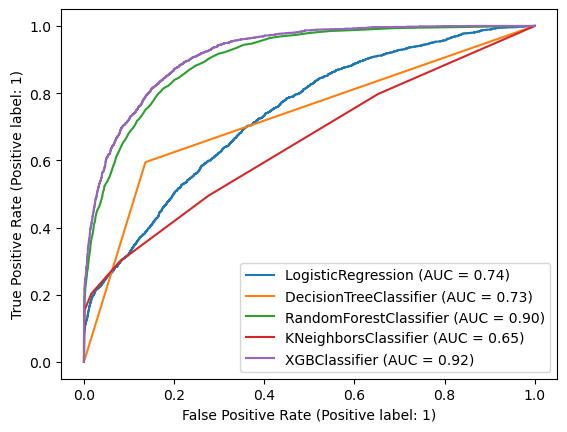

In [44]:
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(LR,x_test,y_test)
RocCurveDisplay.from_estimator(dt,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(kn,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={"size":10},loc='lower right')
plt.show()

In [45]:
grid_params={'criterion':['gini','entropy'],
            'max_depth':[15,20,22],
            'n_estimators':[700,900,1000],
            'min_samples_leaf':[1]
            }

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),grid_params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [48]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 900}

In [50]:
model=RandomForestClassifier(criterion='gini',max_depth=20,n_estimators=1100,min_samples_leaf=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test,pred*100)}%')
print(f'roc_auc_score:{roc_auc_score(y_test,pred)*100}%')
print(f'confusion matrix:\n {confusion_matrix(y_test,pred)}')
print(f'classification Report:\n{classification_report(y_test,pred)}')

Accuracy Score:0.7091523341523341%
roc_auc_score:77.64334022769704%
confusion matrix:
 [[6927  481]
 [ 902 1458]]
classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7408
           1       0.75      0.62      0.68      2360

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768



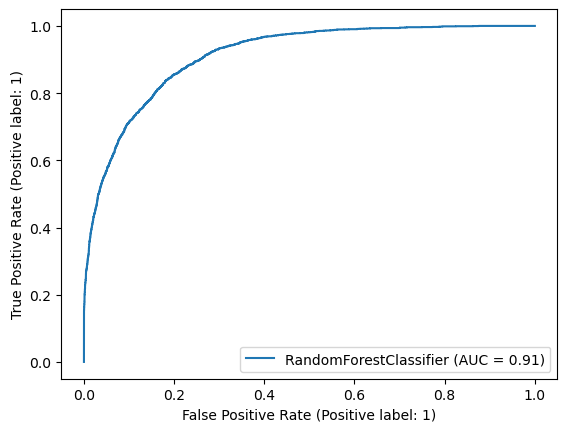

In [53]:
RocCurveDisplay.from_estimator(model,x_test,y_test)
plt.show()

In [54]:
import joblib
joblib.dump(model,"Census_Income.pk1")

['Census_Income.pk1']

In [56]:
Model=joblib.load("Census_Income.pk1")
a=np.array(y_test)
prediction=Model.predict(x_test)
df_final=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
9763,0,0
9764,0,0
9765,0,0
9766,0,0


In [ ]:
#randomforest model is best prediction model